In [0]:
# Defines the Clinical Year Version

YEAR = 2023
year = str(YEAR)

In [0]:
# Shell - Defines the Clinical Year Version

import os
os.environ['year'] = year

In [0]:
# Creates a User-Defined Function to Check for the 'clinicaltrial_<year>' & 'pharma' Files

def check_file(files, path):
    file_list = [dbutils.fs.ls(f"{path}/{file}") for file in files]
    for name, is_present in zip(files, file_list):
        if len(is_present) > 0:
            print(f"{name} is present in {path}/")
        else:
            print(f"{name} is not present in {path}/")

In [0]:
# Checks for the 'clinicaltrial_<year>' & 'pharma' ZIPs

path = "/FileStore/tables"
files = ["clinicaltrial_" + year + ".zip", "pharma.zip"]
check_file(files, path)

clinicaltrial_2023.zip is present in /FileStore/tables/
pharma.zip is present in /FileStore/tables/


In [0]:
# Clears the Existing CSVs in /FileStore/tables/ to Avoid Errors

deleted_file = [  
    "/FileStore/tables/clinicaltrial_" + year + ".csv",  
    "/FileStore/tables/pharma.csv",
    "/FileStore/tables/Q2_Output.csv",  
    "/FileStore/tables/Q3_Output.csv",  
    "/FileStore/tables/Q4_Output.csv",  
    "/FileStore/tables/Q5_Output.csv",
    "/FileStore/tables/clinicaltrial" + year + ".csv"]

for delete in deleted_file:
    dbutils.fs.rm(delete, True)

In [0]:
# Shell - Clears the Existing CSVs & ZIPs in TEMP to Avoid Errors

In [0]:
%sh 
rm /tmp/clinicaltrial_$year.zip
rm /tmp/clinicaltrial_$year.csv
rm /tmp/pharma.zip
rm /tmp/pharma.csv

rm: cannot remove '/tmp/clinicaltrial_2023.zip': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2023.csv': No such file or directory
rm: cannot remove '/tmp/pharma.zip': No such file or directory
rm: cannot remove '/tmp/pharma.csv': No such file or directory


In [0]:
# Copies the ZIPs from /FileStore/tables/ to TEMP

dbutils.fs.cp("/FileStore/tables/clinicaltrial_" + year + ".zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/pharma.zip" , "file:/tmp/")

True

In [0]:
# Shell - Checks for the 'clinicaltrial_<year>' & 'pharma' ZIPs in TEMP then Unzips

In [0]:
%sh
ls /tmp/clinicaltrial_$year.zip
ls /tmp/pharma.zip

/tmp/clinicaltrial_2023.zip
/tmp/pharma.zip


In [0]:
%sh
unzip -d/tmp/ /tmp/clinicaltrial_$year.zip
unzip -d/tmp/ /tmp/pharma.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
# Moves the 'clinicaltrial_<year>' & 'pharma' CSVs from TEMP to /FileStore/tables/

dbutils.fs.mv("file:/tmp/clinicaltrial_" + year + ".csv", "/FileStore/tables/", True)
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/", True)

True

In [0]:
# Checks for the 'clinicaltrial_<year>' & 'pharma' CSVs

path = "/FileStore/tables"
files = ["clinicaltrial_" + year + ".csv", "pharma.csv"]
check_file(files, path)

clinicaltrial_2023.csv is present in /FileStore/tables/
pharma.csv is present in /FileStore/tables/


In [0]:
# Define a function to preprocess each line
def preprocess_line(line):
    # Split the line by '|' delimiter
    ans = []
    if(YEAR == 2023):
        ans = line.split("\t")
    else:
        ans = line.split("|")
    # for part in parts:
    #     ans = ans + (part.split("\t"))
    # ans[0] = ans[0].split('"')[1]
    ans[-1] = ans[-1].split('"')[0]
    return ans

In [0]:
# Creates the RDD for 'clinicaltrial_<year>' & 'pharma'

clinicaltrial = sc.textFile("/FileStore/tables/clinicaltrial_" + year + ".csv") \
                .map(preprocess_line)
pharma = sc.textFile("/FileStore/tables/pharma.csv") \
                .map(lambda line: line.split("\",\""))

In [0]:
if YEAR == 2023:
    clinicaltrial = clinicaltrial.filter(lambda x: len(x) == 14)

In [0]:
# Views the Content of 'clinicaltrial_<year>'

for row in clinicaltrial.take(10):
        print(row)

['"Id', 'Study Title', 'Acronym', 'Status', 'Conditions', 'Interventions', 'Sponsor', 'Collaborators', 'Enrollment', 'Funder Type', 'Type', 'Study Design', 'Start', 'Completion']
['"NCT03630471', 'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India', 'PRIDE', 'COMPLETED', 'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)', "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care", 'Sangath', 'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine', '250.0', 'OTHER', 'INTERVENTIONAL', 'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', '2018-08-20', '2019-02-28']
['"NCT05992571', 'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity', '', 'RECRUITING', 'Cerebrovascular Function|Cognition', 'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB', 

In [0]:
# Views the Content of 'pharma'

for row in pharma.take(10):
    print(row)

['"Company', 'Parent_Company', 'Penalty_Amount', 'Subtraction_From_Penalty', 'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting', 'Penalty_Year', 'Penalty_Date', 'Offense_Group', 'Primary_Offense', 'Secondary_Offense', 'Description', 'Level_of_Government', 'Action_Type', 'Agency', 'Civil/Criminal', 'Prosecution_Agreement', 'Court', 'Case_ID', 'Private_Litigation_Case_Title', 'Lawsuit_Resolution', 'Facility_State', 'City', 'Address', 'Zip', 'NAICS_Code', 'NAICS_Translation', 'HQ_Country_of_Parent', 'HQ_State_of_Parent', 'Ownership_Structure', 'Parent_Company_Stock_Ticker', 'Major_Industry_of_Parent', 'Specific_Industry_of_Parent', 'Info_Source', 'Notes"']
['"Abbott Laboratories', 'Abbott Laboratories', '$5,475,000', '$0', '$5,475,000', '2013', '20131227', 'government-contracting-related offenses', 'False Claims Act and related', 'kickbacks and bribery', "Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks 

In [0]:
# Maps the Headers in 'clinicaltrial_<year>' & 'pharma'

clinicaltrial_header = clinicaltrial.first()
pharma_header = pharma.first()

In [0]:
clinicaltrial_header

['"Id',
 'Study Title',
 'Acronym',
 'Status',
 'Conditions',
 'Interventions',
 'Sponsor',
 'Collaborators',
 'Enrollment',
 'Funder Type',
 'Type',
 'Study Design',
 'Start',
 'Completion']

In [0]:
# Counts the Null Values in 'clinicaltrial_<year>'

missing_counts_clinicaltrial = clinicaltrial \
                .flatMap(lambda x: [col_name for col_name, value in zip(clinicaltrial_header, x) if value == '']) \
                .countByValue()

for col_name, missing_count in missing_counts_clinicaltrial.items():
    print(f"{col_name}: {missing_count}")

Acronym: 350182
Collaborators: 325504
Start: 5144
Completion: 16861
Interventions: 47947
Enrollment: 6919
Conditions: 922
Funder Type: 889
Type: 889
Study Design: 1817


In [0]:
# Counts the Null Values in 'pharma'

missing_counts_pharma = pharma \
                .flatMap(lambda x: [col_name for col_name, value in zip(pharma_header, x) if value == '']) \
                .countByValue()

for col_name, missing_count in missing_counts_pharma.items():
    print(f"{col_name}: {missing_count}")

Prosecution_Agreement: 949
Court: 936
Case_ID: 771
Private_Litigation_Case_Title: 936
Lawsuit_Resolution: 936
Facility_State: 467
City: 769
Address: 845
Zip: 826
NAICS_Code: 848
NAICS_Translation: 865
Secondary_Offense: 808
Description: 298
HQ_State_of_Parent: 434
Parent_Company_Stock_Ticker: 246
Agency: 31
Info_Source: 3


In [0]:
# Removes the Headers in 'clinicaltrial_<year>' & 'pharma'

clinicaltrial = clinicaltrial.filter(lambda x: x != clinicaltrial_header)
pharma = pharma.filter(lambda x: x != pharma_header)

In [0]:
# Question 1 - Counts the Number of Distinct Studies

total_studies = clinicaltrial.map(lambda x: x[0]) \
                .distinct() \
                .count() 

print(f"Total Studies {YEAR}: {total_studies}")

Total Studies 2023: 483420


In [0]:
# Question 2 - Lists the Types of Studies with Frequency
idx = -1
for i in clinicaltrial_header:
    idx = idx + 1
    if(i == "Type"):
        break
types_frequency = clinicaltrial \
        .map(lambda x: x[idx]) \
        .countByValue()
    
types_sorted = sorted(types_frequency.items(), key=lambda x: -x[1])

print(f"Types of Studies {YEAR}")
for types, count in types_sorted:
    print(f"{types}: {count}")

Types of Studies 2023
INTERVENTIONAL: 371382
OBSERVATIONAL: 110221
EXPANDED_ACCESS: 928
: 889


In [0]:
# Question 3 - Lists the Top 5 Conditions with Frequency
idx = -1
for i in clinicaltrial_header:
    idx = idx + 1
    if(i == "Conditions"):
        break

conditions_frequency = clinicaltrial \
                        .flatMap(lambda x: x[idx].split('|')) \
                        .filter(lambda x: x != '') \
                        .countByValue()

conditions_sorted = sorted(conditions_frequency.items(), key=lambda x: -x[1])[:5]

print(f"Top 5 Conditions {YEAR}")
for condition, count in conditions_sorted:
    print(f"{condition}: {count}")

Top 5 Conditions 2023
Healthy: 9731
Breast Cancer: 7502
Obesity: 6549
Stroke: 4071
Hypertension: 4020


In [0]:
# Question 4 - Lists the Top 10 Most Common Non-Pharmaceutical Sponsors with Clinical Trials

pharma_filtered = pharma \
                .map(lambda x: x[1]) \
                .collect()

idx = -1
for i in clinicaltrial_header:
    idx = idx + 1
    if(i == "Sponsor"):
        break

clinicaltrial_filtered = clinicaltrial \
                .filter(lambda x: x[idx] not in pharma_filtered)

sponsor_count = clinicaltrial_filtered \
                .map(lambda x: (x[idx],1)) \
                .reduceByKey(lambda a, b: a + b) \
                .sortBy(lambda x: -x[1]) \
                .take(10)


# sponsor_count = clinicaltrial_filtered \
#                 .map(lambda x: (x[idx])) \
#                 .take(10)

print(f"Top 10 Most Common Non-Pharmaceutical Sponsors {YEAR}")
for sponsor, count in sponsor_count:
    print(f"{sponsor}: {count}")

Top 10 Most Common Non-Pharmaceutical Sponsors 2023
National Cancer Institute (NCI): 3410
Assiut University: 3335
Cairo University: 3023
Assistance Publique - Hôpitaux de Paris: 2951
Mayo Clinic: 2766
M.D. Anderson Cancer Center: 2702
Novartis Pharmaceuticals: 2393
National Institute of Allergy and Infectious Diseases (NIAID): 2340
Massachusetts General Hospital: 2263
National Taiwan University Hospital: 2181


In [0]:
sponsor_count

[('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

In [0]:
# Question 5 - Lists the Completed Studies Each Month in a Given Year

from datetime import datetime
def parse_date(date_str):
        formats = ['%Y-%m', '%Y-%m-%d', '%d-%b-%Y', '%b %Y']
        for fmt in formats:
            try:
                return datetime.strptime(date_str, fmt).replace(day=1)
            except ValueError:
                continue
        return None

idx = -1
for i in clinicaltrial_header:
    idx = idx + 1
    if(i == "Status"):
        break

idx2 = -1
for i in clinicaltrial_header:
    idx2 = idx2 + 1
    if(i == "Completion"):
        break
completed_studies = clinicaltrial \
                    .filter(lambda x: (x[idx] == "COMPLETED" or x[idx] == "Completed") and len(x[idx2])>5) \
                    .map(lambda x: (parse_date(x[idx2]), 1)) \
                    .filter(lambda x: x[0].year == YEAR) \
                    .reduceByKey(lambda a, b: a + b) \
                    .sortByKey() \
                    .collect()

print(f"Completed Studies {YEAR}")
for month, count in completed_studies:
    print(f"{month.strftime('%b')}: {count}")


Completed Studies 2023
Jan: 1494
Feb: 1272
Mar: 1552
Apr: 1324
May: 1415
Jun: 1619
Jul: 1360
Aug: 1230
Sep: 1152
Oct: 1058
Nov: 909
Dec: 1082


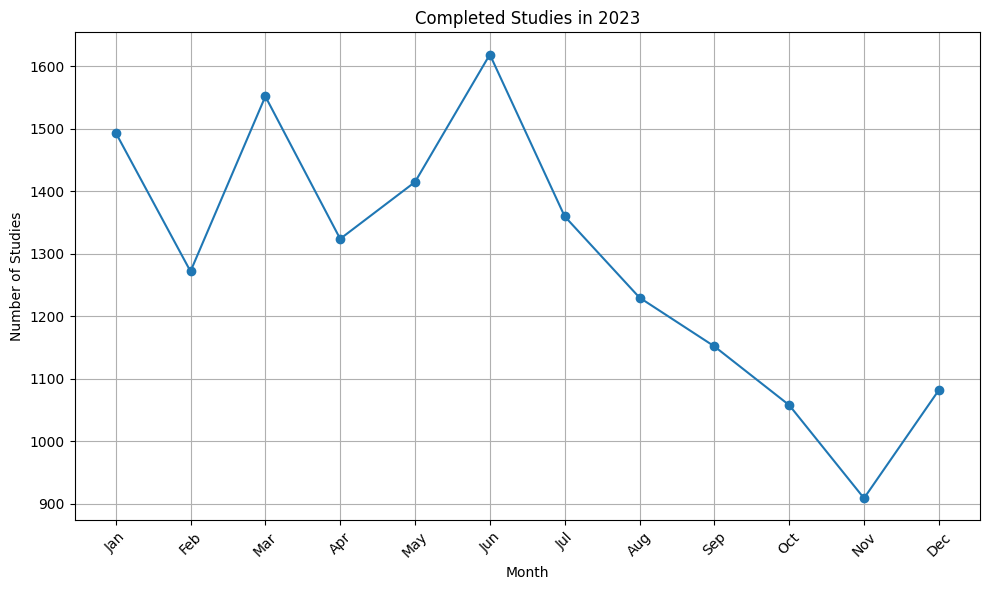

In [0]:
# visualization 0f Q5 in RDD
import matplotlib.pyplot as plt

# Extracting month names and counts from completed_studies
months = [month.strftime('%b') for month, _ in completed_studies]
counts = [count for _, count in completed_studies]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, counts, marker='o', linestyle='-')
plt.title(f"Completed Studies in {YEAR}")
plt.xlabel("Month")
plt.ylabel("Number of Studies")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

In [0]:
# Extra Analysis - Lists the Sponsors Recruiting with Clinical Trials
idx = -1
for i in clinicaltrial_header:
    idx = idx + 1
    if(i == "Status"):
        break

idx2 =-1

for i in clinicaltrial_header:
    idx2 = idx2 + 1
    if(i == "Sponsor"):
        break
sponsor_count = clinicaltrial \
                 .filter(lambda x: x[idx] == "Recruiting" or x[idx] == "RECRUITING") \
                 .map(lambda x: (x[idx2], 1)) \
                 .reduceByKey(lambda a, b: a + b) \
                 .sortBy(lambda x: -x[1]) \
                 .take(10)

print(f"Sponsors Currently Recruiting {YEAR}")
for sponsor, count in sponsor_count:
    print(f"{sponsor}: {count}")

Sponsors Currently Recruiting 2023
M.D. Anderson Cancer Center: 543
Assistance Publique - Hôpitaux de Paris: 497
Mayo Clinic: 483
Cairo University: 361
National Cancer Institute (NCI): 360
VA Office of Research and Development: 360
Memorial Sloan Kettering Cancer Center: 349
Massachusetts General Hospital: 336
Chinese University of Hong Kong: 328
Sun Yat-sen University: 319
